## Laptop Price Predictor

### 1) Problem statement
- This project understands how the laptop's price is affected by other variables such as Company, Product, TypeName,size, Screen resolution, Cpu, Ram ,Memory,Gpu,OpSys and Weight


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/muhammetvarl/laptop-price
- The data consists of 13 column and 1303 rows.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('D:\\Study\\ML-Projects\\Project-2(Laptop_Price_Predictor)\\notebooks\\data\\laptop_price.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Shape of the dataset

    1 Company- String -Laptop Manufacturer
    2 Product -String -Brand and Model
    3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
    4 Inches -Numeric- Screen Size
    5 ScreenResolution -String- Screen Resolution
    6 Cpu- String -Central Processing Unit (CPU)
    7 Ram -String- Laptop RAM
    8 Memory -String- Hard Disk / SSD Memory
    9 GPU -String- Graphics Processing Units (GPU)
    10 OpSys -String- Operating System
    11 Weight -String- Laptop Weight
    12 Price_euros -Numeric- Price (Euro)

### 3.1 Checking Missing values

In [4]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#### There are no missing values in the data set

### 3.2 Checking Duplicates

In [5]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [6]:
# Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### 3.4 Checking the number of unique values of each column

In [7]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

### 3.5 Checking statistics of data set

In [8]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


### 3.7 Exploring Data

In [9]:
df.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
253,258,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.37kg,1849.00
91,93,Acer,Aspire 5,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX150,Windows 10,2.2kg,689.00
304,309,Asus,GL553VE-FY082T (i7-7700HQ/8GB/1TB,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,1265.00
52,53,HP,255 G6,Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4GB,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.86kg,398.49
33,34,Dell,XPS 13,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,1869.00
386,392,Lenovo,Ideapad 510S-13IKB,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.5kg,549.00
372,378,Asus,Rog Strix,Gaming,17.3,IPS Panel Full HD 1920x1080,AMD Ryzen 1700 3GHz,16GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.25kg,2199.00
497,504,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.48kg,1749.00
228,233,Asus,K756UX-T4340T (i5-7200U/8GB/500GB,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 500GB HDD,Nvidia GeForce GTX 950M,Windows 10,2.69kg,891.00
758,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99


#### Removing Laptop_ID column Which has no value

In [10]:
df=df.drop(columns=['laptop_ID','Product'],axis=1)

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Scren Resolution needs to be changed into multiple category columns

In [12]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [13]:
# IPS or not
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [14]:
# x_Resolution
new = df['ScreenResolution'].str.strip().str.split('x',expand=True)
x_res = new[0].str[-4:]
df['x_res'] = x_res
df['y_res'] = new[1]
df['x_res']=df['x_res'].astype(int)
df['y_res']=df['y_res'].astype(int)

In [15]:
df['PPI'] = ((df['x_res']**2 + df['y_res']**2)**.5)/df['Inches']

In [16]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,PPI
765,Acer,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.6kg,655.00,0,0,1366,768,117.826530
419,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon RX 550,Windows 10,1.75kg,1215.38,0,1,1920,1080,157.350512


#### Removing ScreenResolution,x_res,y_res,Inches columns because we already made Touchscreen,IPS,ppi column using them

In [17]:
df.drop(columns=['ScreenResolution','Inches','x_res','y_res'],axis=1,inplace=True)

In [18]:
df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI
1065,Dell,Ultrabook,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1458.0,0,0,165.632118
1068,Dell,Gaming,Intel Core i7 6700HQ 2.6GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,3.21kg,1329.0,0,0,282.423996


#### Cpu column needs to be change into different category columns

In [19]:
def cpu_categories(x):
    if 'Intel Core i5' in x:
        return 'Intel Core i5'
    elif 'Intel Core i7' in x:
        return 'Intel Core i7'
    elif 'Intel Core i3' in x:
        return 'Intel Core i3'
    elif 'AMD' in x:
        return 'AMD Processor'
    else:
        return 'Other Intel processors'

In [20]:
df['Cpu_Brand'] = df['Cpu'].apply(cpu_categories)

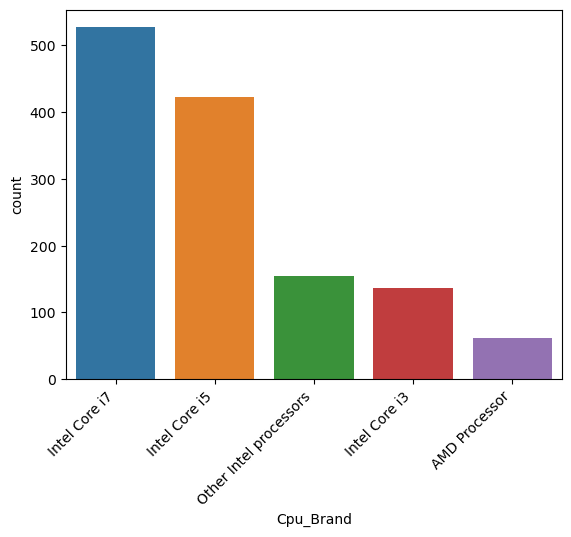

#### No longer needed Cpu column

In [21]:
df.drop(columns=['Cpu'],inplace=True)

In [22]:
df['Cpu_Brand'].value_counts()

Intel Core i7             527
Intel Core i5             423
Other Intel processors    155
Intel Core i3             136
AMD Processor              62
Name: Cpu_Brand, dtype: int64

In [23]:
df.sample(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_Brand
224,Dell,Gaming,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34,0,1,127.335675,Intel Core i7


#### Ram can be made as a INT type feature

In [24]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [25]:
# changing data type
df['Ram'] = df['Ram'].astype(int)

#### Memory

In [26]:
#df['Memory'].value_counts()

In [27]:
df['Memory'] = df['Memory'].str.replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
new = df["Memory"].str.split("+", n = 1, expand = True)
df["first_part"]= new[0]
df["first_part"]=df["first_part"].str.strip()

df["second_part"]= new[1]
                  
df["first_part_HDD"] = df["first_part"].apply(lambda x: 1 if "HDD" in x else 0)
df["first_part_SSD"] = df["first_part"].apply(lambda x: 1 if "SSD" in x else 0)
df["first_part_Hybrid"] = df["first_part"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["first_part_Flash_Storage"] = df["first_part"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first_part'] = df['first_part'].str.replace(r'\D', '') #replaces any non-digit character with an empty string
df["first_part"] = df["first_part"].astype(int)
df['first_part'] = df['first_part'].apply(lambda x:  24*int(x/1000)+x if x>=1000 else x)
df['first_part'] = df['first_part'].apply(lambda x:  512 if x>=500 and x<=520 else x)


df["second_part"].fillna("0", inplace = True)
df["second_part_HDD"] = df["second_part"].apply(lambda x: 1 if "HDD" in x else 0)
df["second_part_SSD"] = df["second_part"].apply(lambda x: 1 if "SSD" in x else 0)
df["second_part_Hybrid"] = df["second_part"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["second_part_Flash_Storage"] = df["second_part"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second_part'] = df['second_part'].str.replace(r'\D', '')
df["second_part"] = df["second_part"].astype(int)
df['second_part'] = df['second_part'].apply(lambda x:  24*int(x/1000)+x if x>=1000 else x)
df['second_part'] = df['second_part'].apply(lambda x:  512 if x>=500 and x<=520 else x)


df["HDD"]=(df["first_part"]*df["first_part_HDD"]+df["second_part"]*df["second_part_HDD"])
df["SSD"]=(df["first_part"]*df["first_part_SSD"]+df["second_part"]*df["second_part_SSD"])
df["Hybrid"]=(df["first_part"]*df["first_part_Hybrid"]+df["second_part"]*df["second_part_Hybrid"])
df["Flash_Storage"]=(df["first_part"]*df["first_part_Flash_Storage"]+df["second_part"]*df["second_part_Flash_Storage"])

df.drop(columns=['first_part', 'second_part', 'first_part_HDD', 'first_part_SSD', 'first_part_Hybrid',
       'first_part_Flash_Storage', 'second_part_HDD', 'second_part_SSD', 'second_part_Hybrid',
       'second_part_Flash_Storage'],inplace=True)

#### We no longer needed memory column anymore

In [28]:
df.drop(columns=['Memory'],inplace=True)

In [29]:
df.sample(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
109,Lenovo,Notebook,8,Intel HD Graphics 620,Windows 10,1.58kg,1480.0,0,1,157.350512,Intel Core i7,0,256,0,0
322,Asus,Notebook,8,Intel HD Graphics 620,Windows 10,2kg,1094.0,0,0,157.350512,Intel Core i7,0,256,0,0


#### Gpu names are not adding any benefit. So we can just categorize it by brand

In [30]:
df['Gpu_brand']=df['Gpu'].apply(lambda x: x.split()[0])
df.drop(columns=['Gpu'],inplace=True)

In [31]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

#### We can delete ARM brand as it just has only one row. It won't help to learn the model.

In [32]:
df = df[df['Gpu_brand']!='ARM']
df.shape

(1302, 15)

In [33]:
df.sample(2)

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
1111,Dell,Notebook,4,Windows 7,2.24kg,769.15,0,0,100.454670,Intel Core i5,512,0,0,0,AMD
1239,Lenovo,Notebook,16,Windows 10,1.4kg,1499.00,0,1,165.632118,Intel Core i7,0,512,0,0,Intel


#### As there are many os names ,we can group them into specific categories

In [34]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [35]:
def convert_os(os_name):
    if os_name == 'Windows 10' or os_name == 'Windows 7' or os_name == 'Windows 10 S':
        return 'Windows'
    elif os_name == 'macOS'or os_name == 'Mac OS X':
        return 'Mac OS'
    else:
        return 'Others/No OS/Linux'

In [36]:
df['Os'] = df['OpSys'].apply(convert_os)

In [37]:
df['Os'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac OS                  21
Name: Os, dtype: int64

In [38]:
df.drop(columns=['OpSys'],inplace=True)

In [39]:
df.sample(2)

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,Os
334,Asus,Gaming,8,2.5kg,999.00,0,0,141.211998,Intel Core i7,0,256,0,0,Nvidia,Windows
766,Asus,Notebook,4,2.8kg,470.34,0,0,90.583402,Other Intel processors,1024,0,0,0,Nvidia,Windows


#### Weight can be made as a Float type feature

In [40]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [41]:
# changing data type
df['Weight'] = df['Weight'].astype(float)

#### Price_euros need to be converted to Price_bdt

In [42]:
df['Price_euros'] = df['Price_euros']*120.53

#### Renaming required columns

In [43]:
df.rename(columns={'Ram':'Ram(GB)','Weight':'Weight(kg)','Price_euros':'Price_bdt','Inches':'Size',
                   'HDD':'HDD(GB)','SSD':'SSD(GB)','Hybrid':'Hybrid(GB)','Flash_Storage':'Flash_Storage(GB)',
                   'Gpu_brand':'Gpu_Brand'},inplace=True)

In [44]:
df['Price_BDT'] = df['Price_bdt']
df.drop(columns=['Price_bdt'],inplace=True)
df['Price_BDT']=df['Price_BDT'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   TypeName           1302 non-null   object 
 2   Ram(GB)            1302 non-null   int32  
 3   Weight(kg)         1302 non-null   float64
 4   Touchscreen        1302 non-null   int64  
 5   IPS                1302 non-null   int64  
 6   PPI                1302 non-null   float64
 7   Cpu_Brand          1302 non-null   object 
 8   HDD(GB)            1302 non-null   int64  
 9   SSD(GB)            1302 non-null   int64  
 10  Hybrid(GB)         1302 non-null   int64  
 11  Flash_Storage(GB)  1302 non-null   int64  
 12  Gpu_Brand          1302 non-null   object 
 13  Os                 1302 non-null   object 
 14  Price_BDT          1302 non-null   int32  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 152.6+ KB


In [46]:
df.describe()

,Ram(GB),Weight(kg),Touchscreen,IPS,PPI,HDD(GB),SSD(GB),Hybrid(GB),Flash_Storage(GB),Price_BDT
count,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,8.385561,2.039416,0.146697,0.27957,146.568497,424.036866,184.168971,9.044547,4.534562,135480.479263
std,5.085166,0.665274,0.353940,0.44896,43.069016,528.272446,188.271859,94.791212,30.276156,84269.627016
min,2.000000,0.690000,0.000000,0.00000,90.583402,0.000000,0.000000,0.000000,0.000000,20972.000000
25%,4.000000,1.500000,0.000000,0.00000,127.335675,0.000000,0.000000,0.000000,0.000000,72197.000000
50%,8.000000,2.040000,0.000000,0.00000,141.211998,0.000000,256.000000,0.000000,0.000000,117877.500000
75%,8.000000,2.300000,0.000000,1.00000,157.350512,1024.000000,256.000000,0.000000,0.000000,179400.250000
max,64.000000,4.700000,1.000000,1.00000,352.465147,2048.000000,1024.000000,1024.000000,512.000000,735112.000000


#### Insight
- Minimum laptop size starts from 10.1 inches and max can be 18.4 inches. Average size is 15 inches
- Minimum ram is 2 GB and maximum is 64 GB. In average laptop contains 8 GB of ram.
- Minimum Weight is 0.69 kg and maximum is 4.7 kg. In average laptops are 2.03 KG in weight.
- Highest HDD space is 2TB
- Highest SSD space is 1TB
- Highest Hybrid space is 1TB
- Highest Flash storage is 512GB
- Laptop price starts from 20972.22 BDT and goes maximum 735112 BDT.

### 4. Exploring Data ( Visualization )
#### 4.1 Univariate Analysis
- Countplot
- Histogram
- Kernel Distribution Function (KDE)
- Distplot

#### 4.1.1 Countplot

#### Laptop companies in the dataset

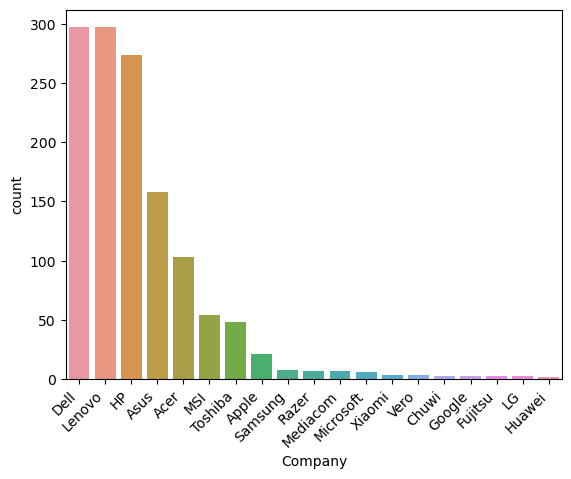

In [47]:
sns.countplot(x='Company', data=df, order=df['Company'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Types of laptops are in the dataset

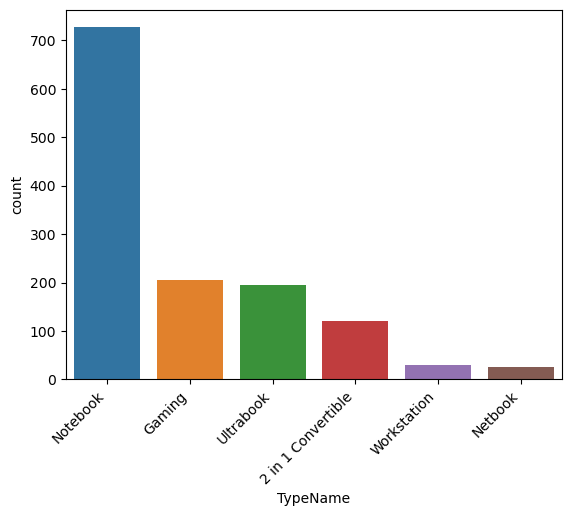

In [48]:
sns.countplot(x='TypeName', data=df, order=df['TypeName'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Types of CPU brands

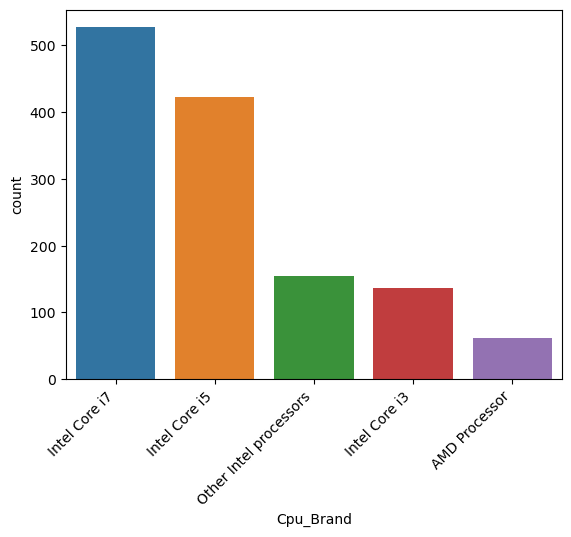

In [49]:
sns.countplot(x='Cpu_Brand', data=df, order=df['Cpu_Brand'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

In [50]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O' and feature not in ['Touchscreen', 'IPS']]
numeric_features

['Ram(GB)',
 'Weight(kg)',
 'PPI',
 'HDD(GB)',
 'SSD(GB)',
 'Hybrid(GB)',
 'Flash_Storage(GB)',
 'Price_BDT']

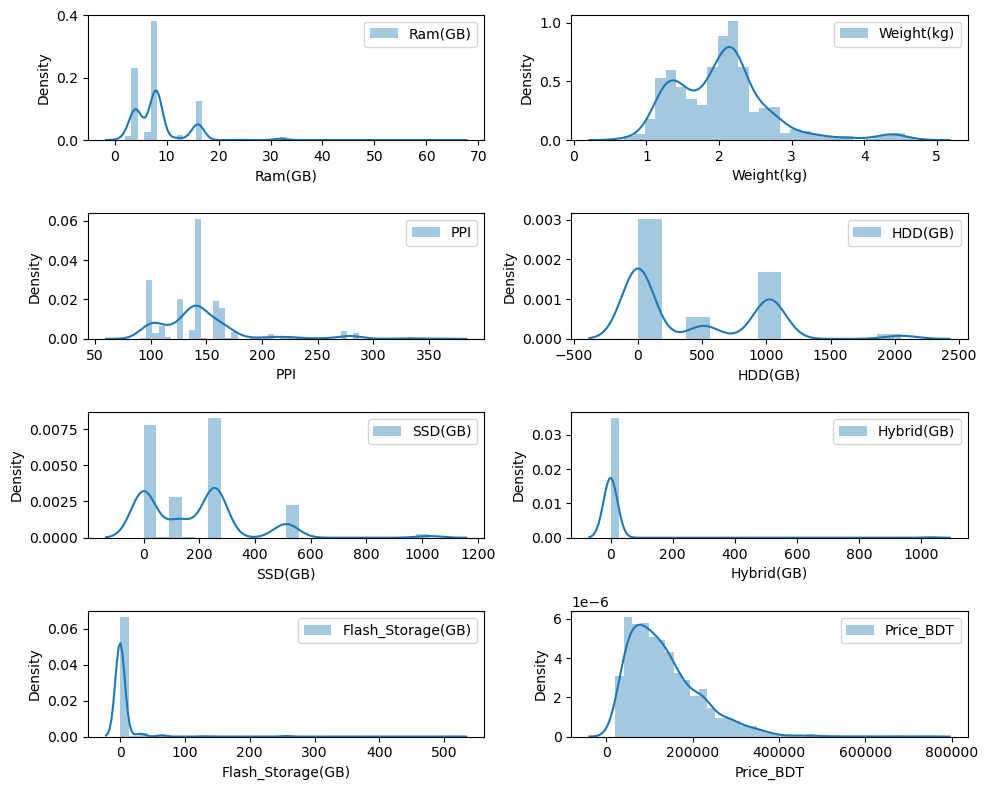

In [51]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    sns.distplot(df[feature], ax=axes[i], label=feature)
    axes[i].legend()

plt.tight_layout()
plt.show()

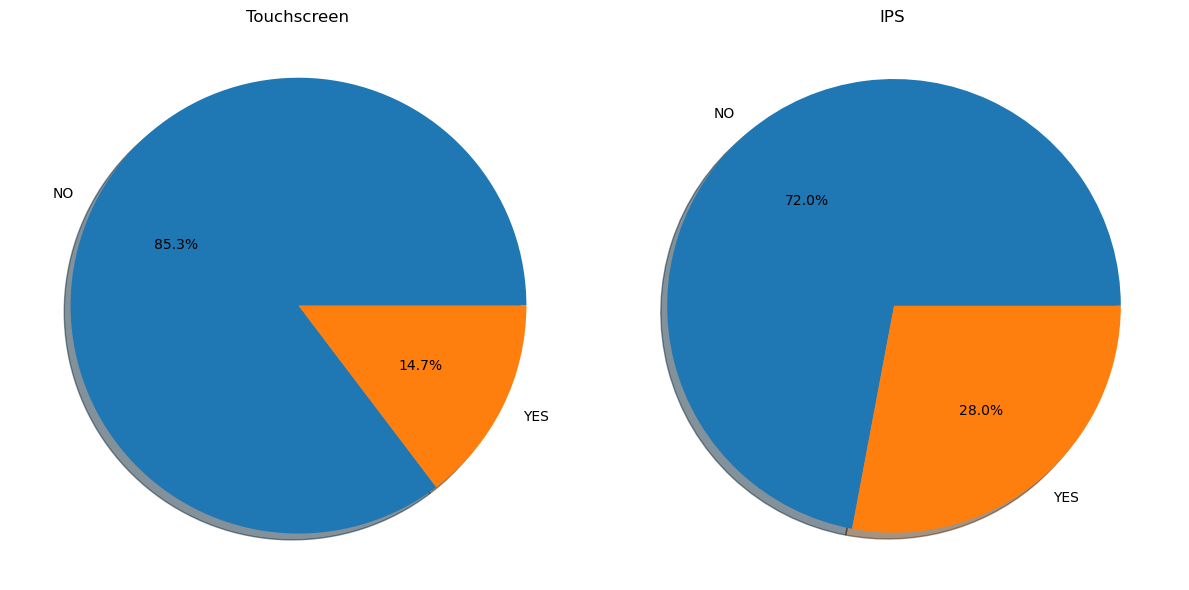

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(df['Touchscreen'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
axes[0].set_title('Touchscreen')
axes[0].axis('equal')  

axes[1].pie(df['IPS'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
axes[1].set_title('IPS')
axes[1].axis('equal') 

plt.tight_layout()
plt.show()

#### Types of operating system are in the dataset

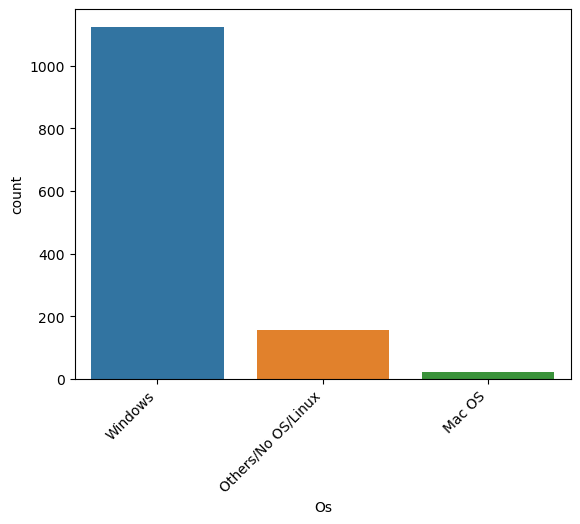

In [62]:
sns.countplot(x='Os', data=df, order=df['Os'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

#### 4.1.2 Histogram & KDE

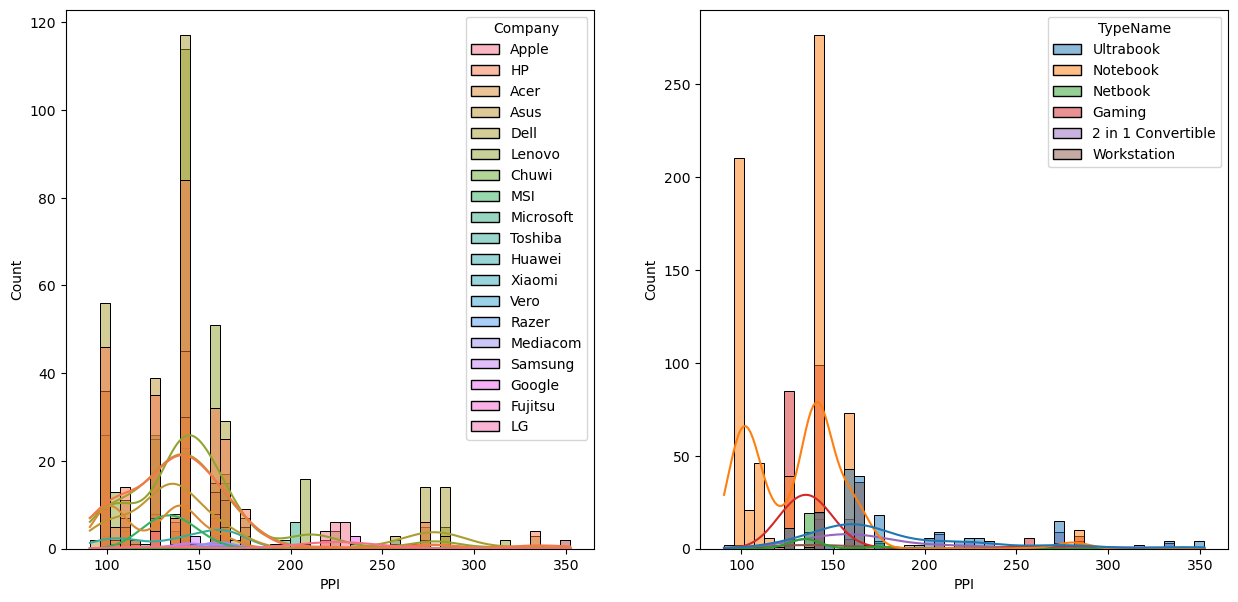

In [54]:
# PPI
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='PPI',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='PPI',kde=True,hue='TypeName')
plt.show()

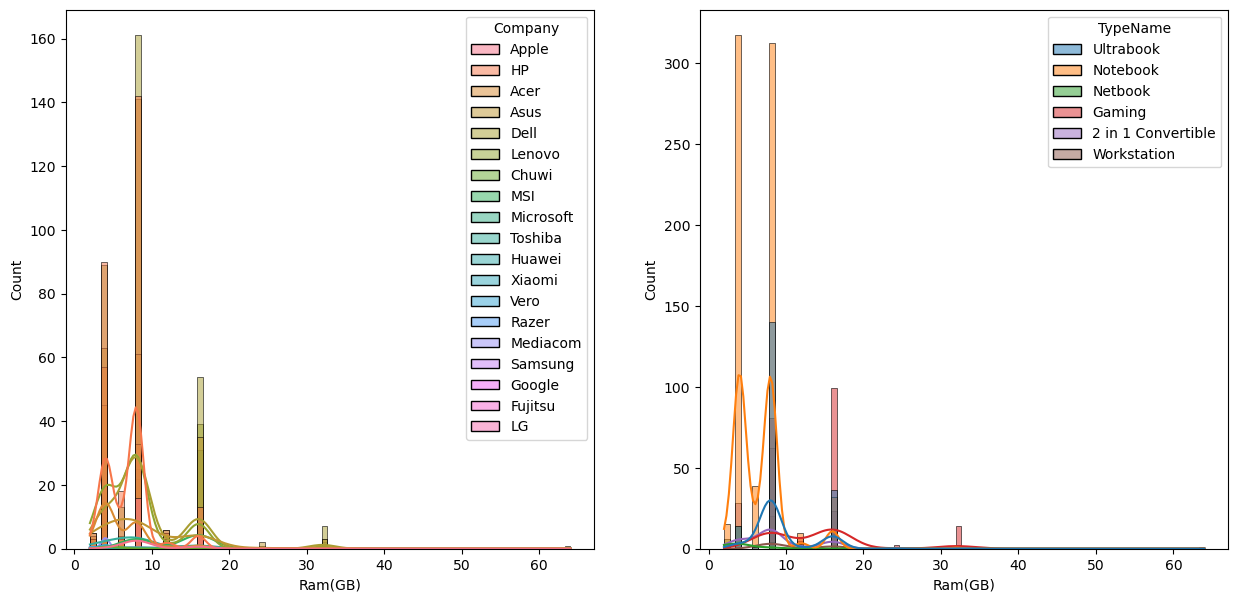

In [55]:
# Ram(GB)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Ram(GB)',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Ram(GB)',kde=True,hue='TypeName')
plt.show()

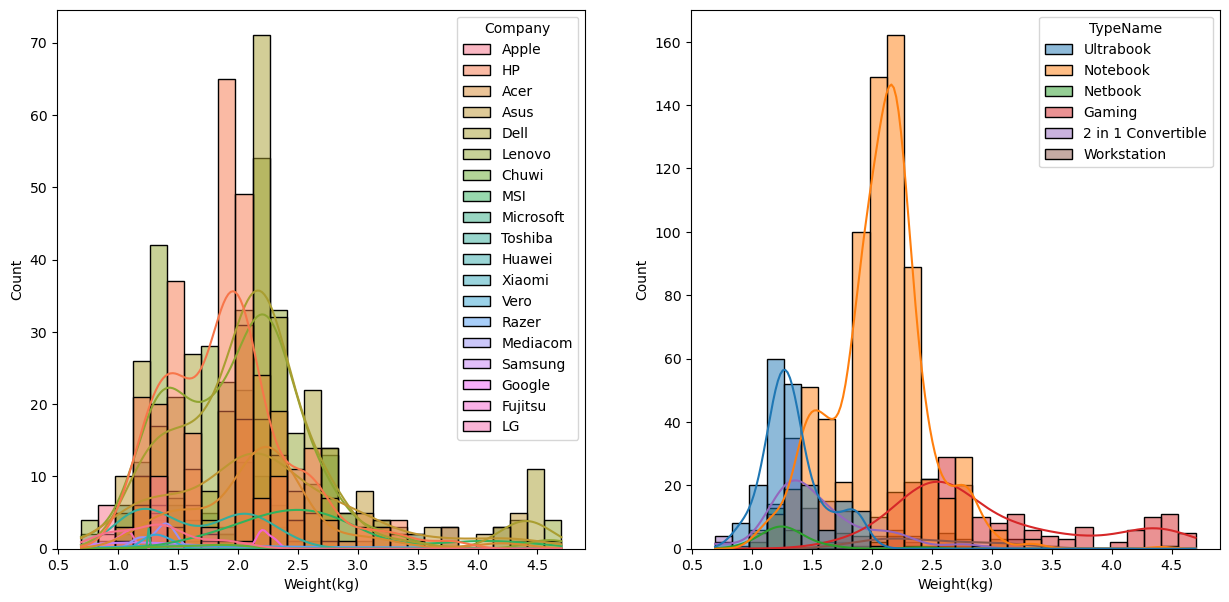

In [56]:
# Weight(kg)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Weight(kg)',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Weight(kg)',kde=True,hue='TypeName')
plt.show()

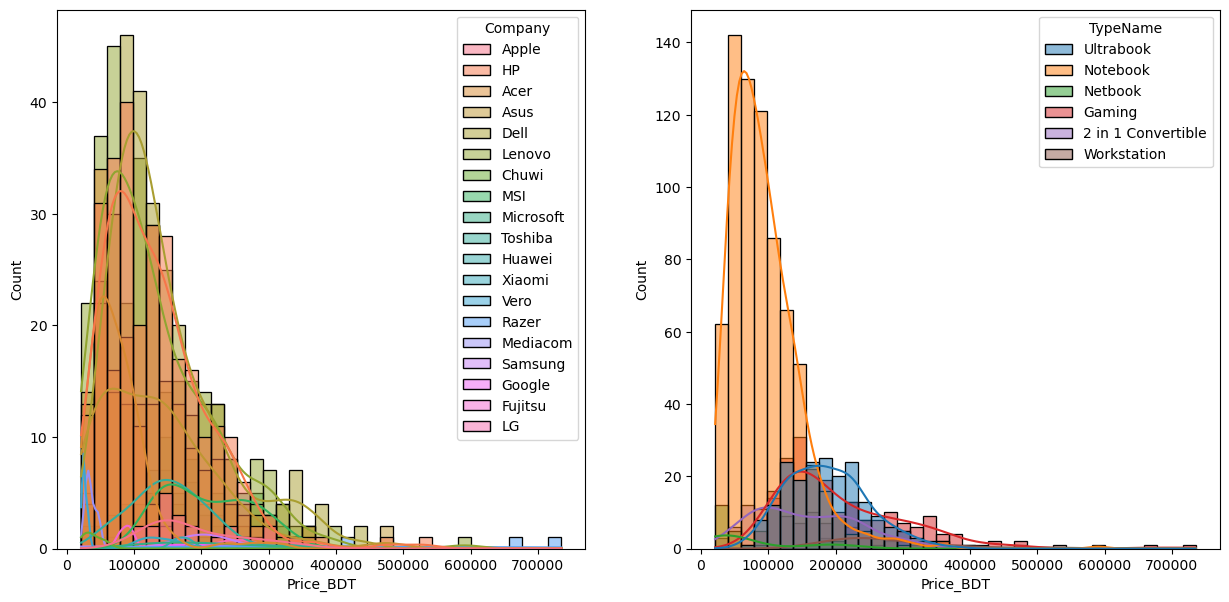

In [57]:
# Price_bdt
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Price_BDT',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Price_BDT',kde=True,hue='TypeName')
plt.show()

#### 4.2 Maximum values in numerical columns

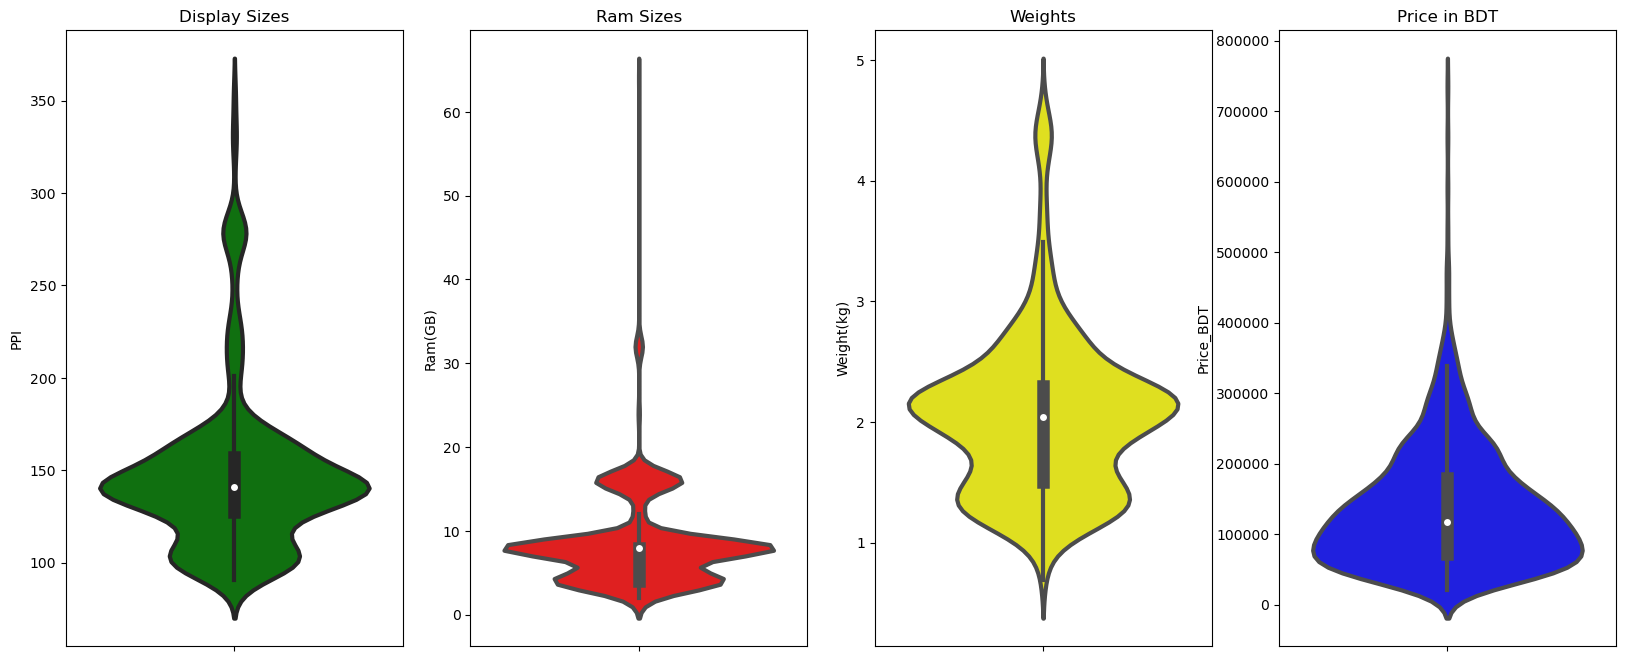

In [58]:
plt.figure(figsize=(20,8))
plt.subplot(1, 4, 1)
plt.title('Display Sizes')
sns.violinplot(y='PPI',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Ram Sizes')
sns.violinplot(y='Ram(GB)',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Weights')
sns.violinplot(y='Weight(kg)',data=df,color='yellow',linewidth=3)
plt.subplot(1, 4, 4)
plt.title('Price in BDT')
sns.violinplot(y='Price_BDT',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above four plots its clearly visible that most of the Display size are between 15-16 inches, rams are between 4-8 GB, Weights are between 2-2.5 kg and prices are between 50k-100k

#### BIVARIATE ANALYSIS ( Does Company have any impact on Laptop prices ? ) 

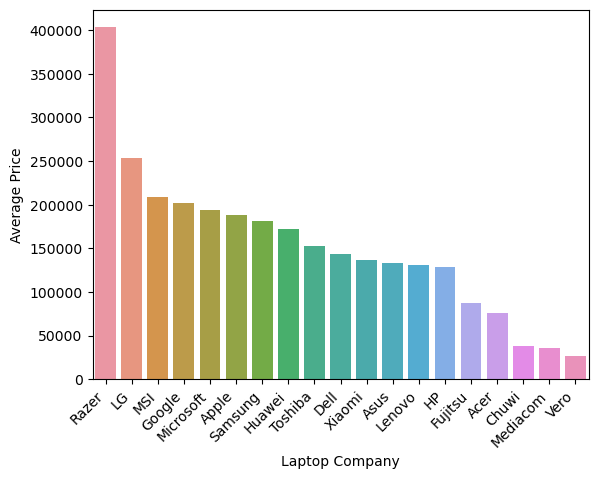

In [59]:
company_group = df.groupby('Company').mean().reset_index()
company_group_sorted = company_group.sort_values(by='Price_BDT', ascending=False)
sns.barplot(x='Company', y='Price_BDT', data=company_group_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Laptop Company')
plt.ylabel("Average Price")
plt.show()

#### Insights
- From the above four plots its clearly visible that Razer creates the most costly laptops and the least costly laptops are from Vero.

#### 4.3 BIVARIATE ANALYSIS ( Does Laptop type and OS type have any impact on Laptop prices ? ) 

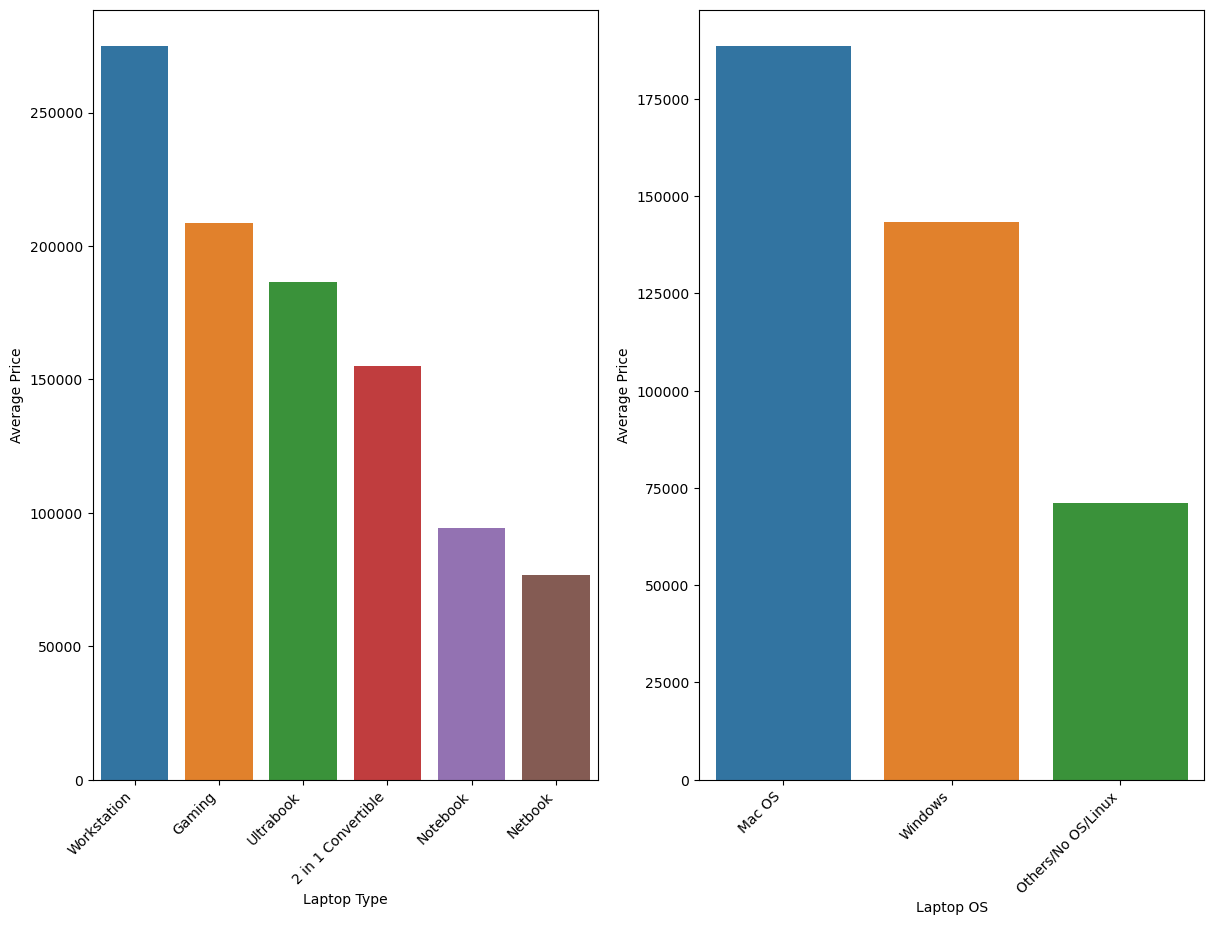

In [64]:
plt.figure(figsize=(30,10))
plt.subplot(1,4,1)
type_group = df.groupby('TypeName').mean().reset_index()
type_group_sorted = type_group.sort_values(by='Price_BDT', ascending=False)
sns.barplot(x='TypeName', y='Price_BDT', data=type_group_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Laptop Type')
plt.ylabel("Average Price")

plt.subplot(1,4,2)
os_group = df.groupby('Os').mean().reset_index()
os_group_sorted = os_group.sort_values(by='Price_BDT', ascending=False)
sns.barplot(x='Os', y='Price_BDT', data=os_group_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Laptop OS')
plt.ylabel("Average Price")
plt.show()

#### Insights
- Workstations and gaming laptops are most costly while Netbook and Notebooks are least costly
- macOS are the most expensive operating system there where Android is the least expensive

#### 4.4 CHECKING OUTLIERS

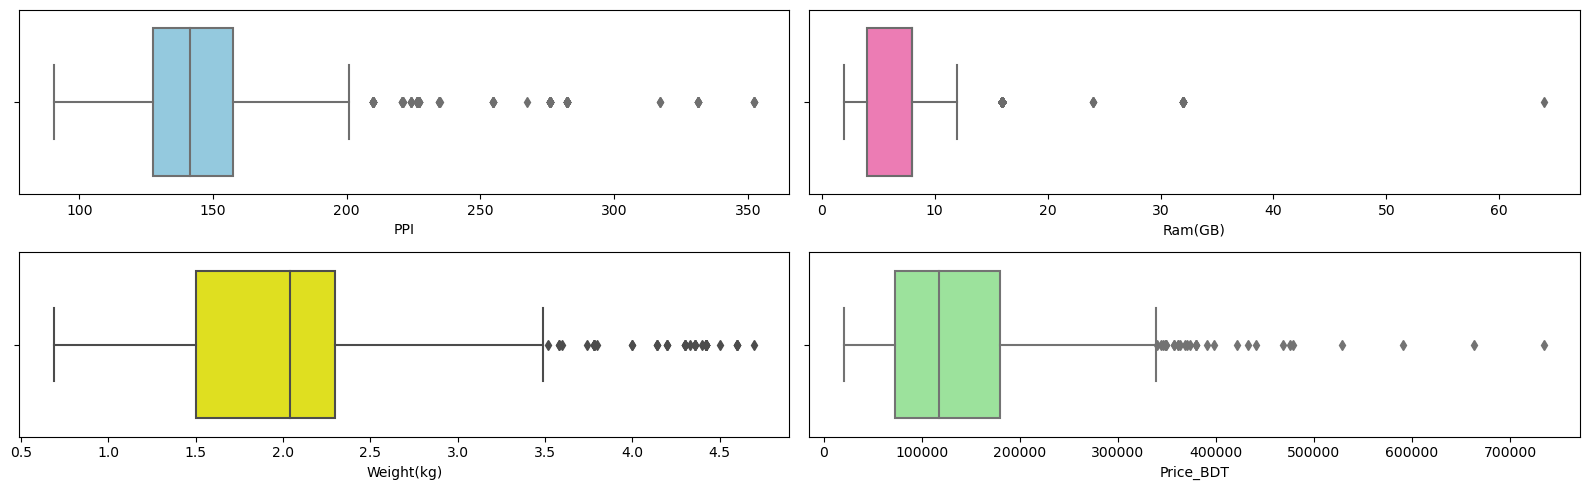

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(16, 5))
sns.boxplot(df['PPI'], color='skyblue', ax=axes[0, 0])
sns.boxplot(df['Ram(GB)'], color='hotpink', ax=axes[0, 1])
sns.boxplot(df['Weight(kg)'], color='yellow', ax=axes[1, 0])
sns.boxplot(df['Price_BDT'], color='lightgreen', ax=axes[1, 1])
plt.tight_layout()
plt.show()

#### 4.5 MUTIVARIATE ANALYSIS USING PAIRPLOT

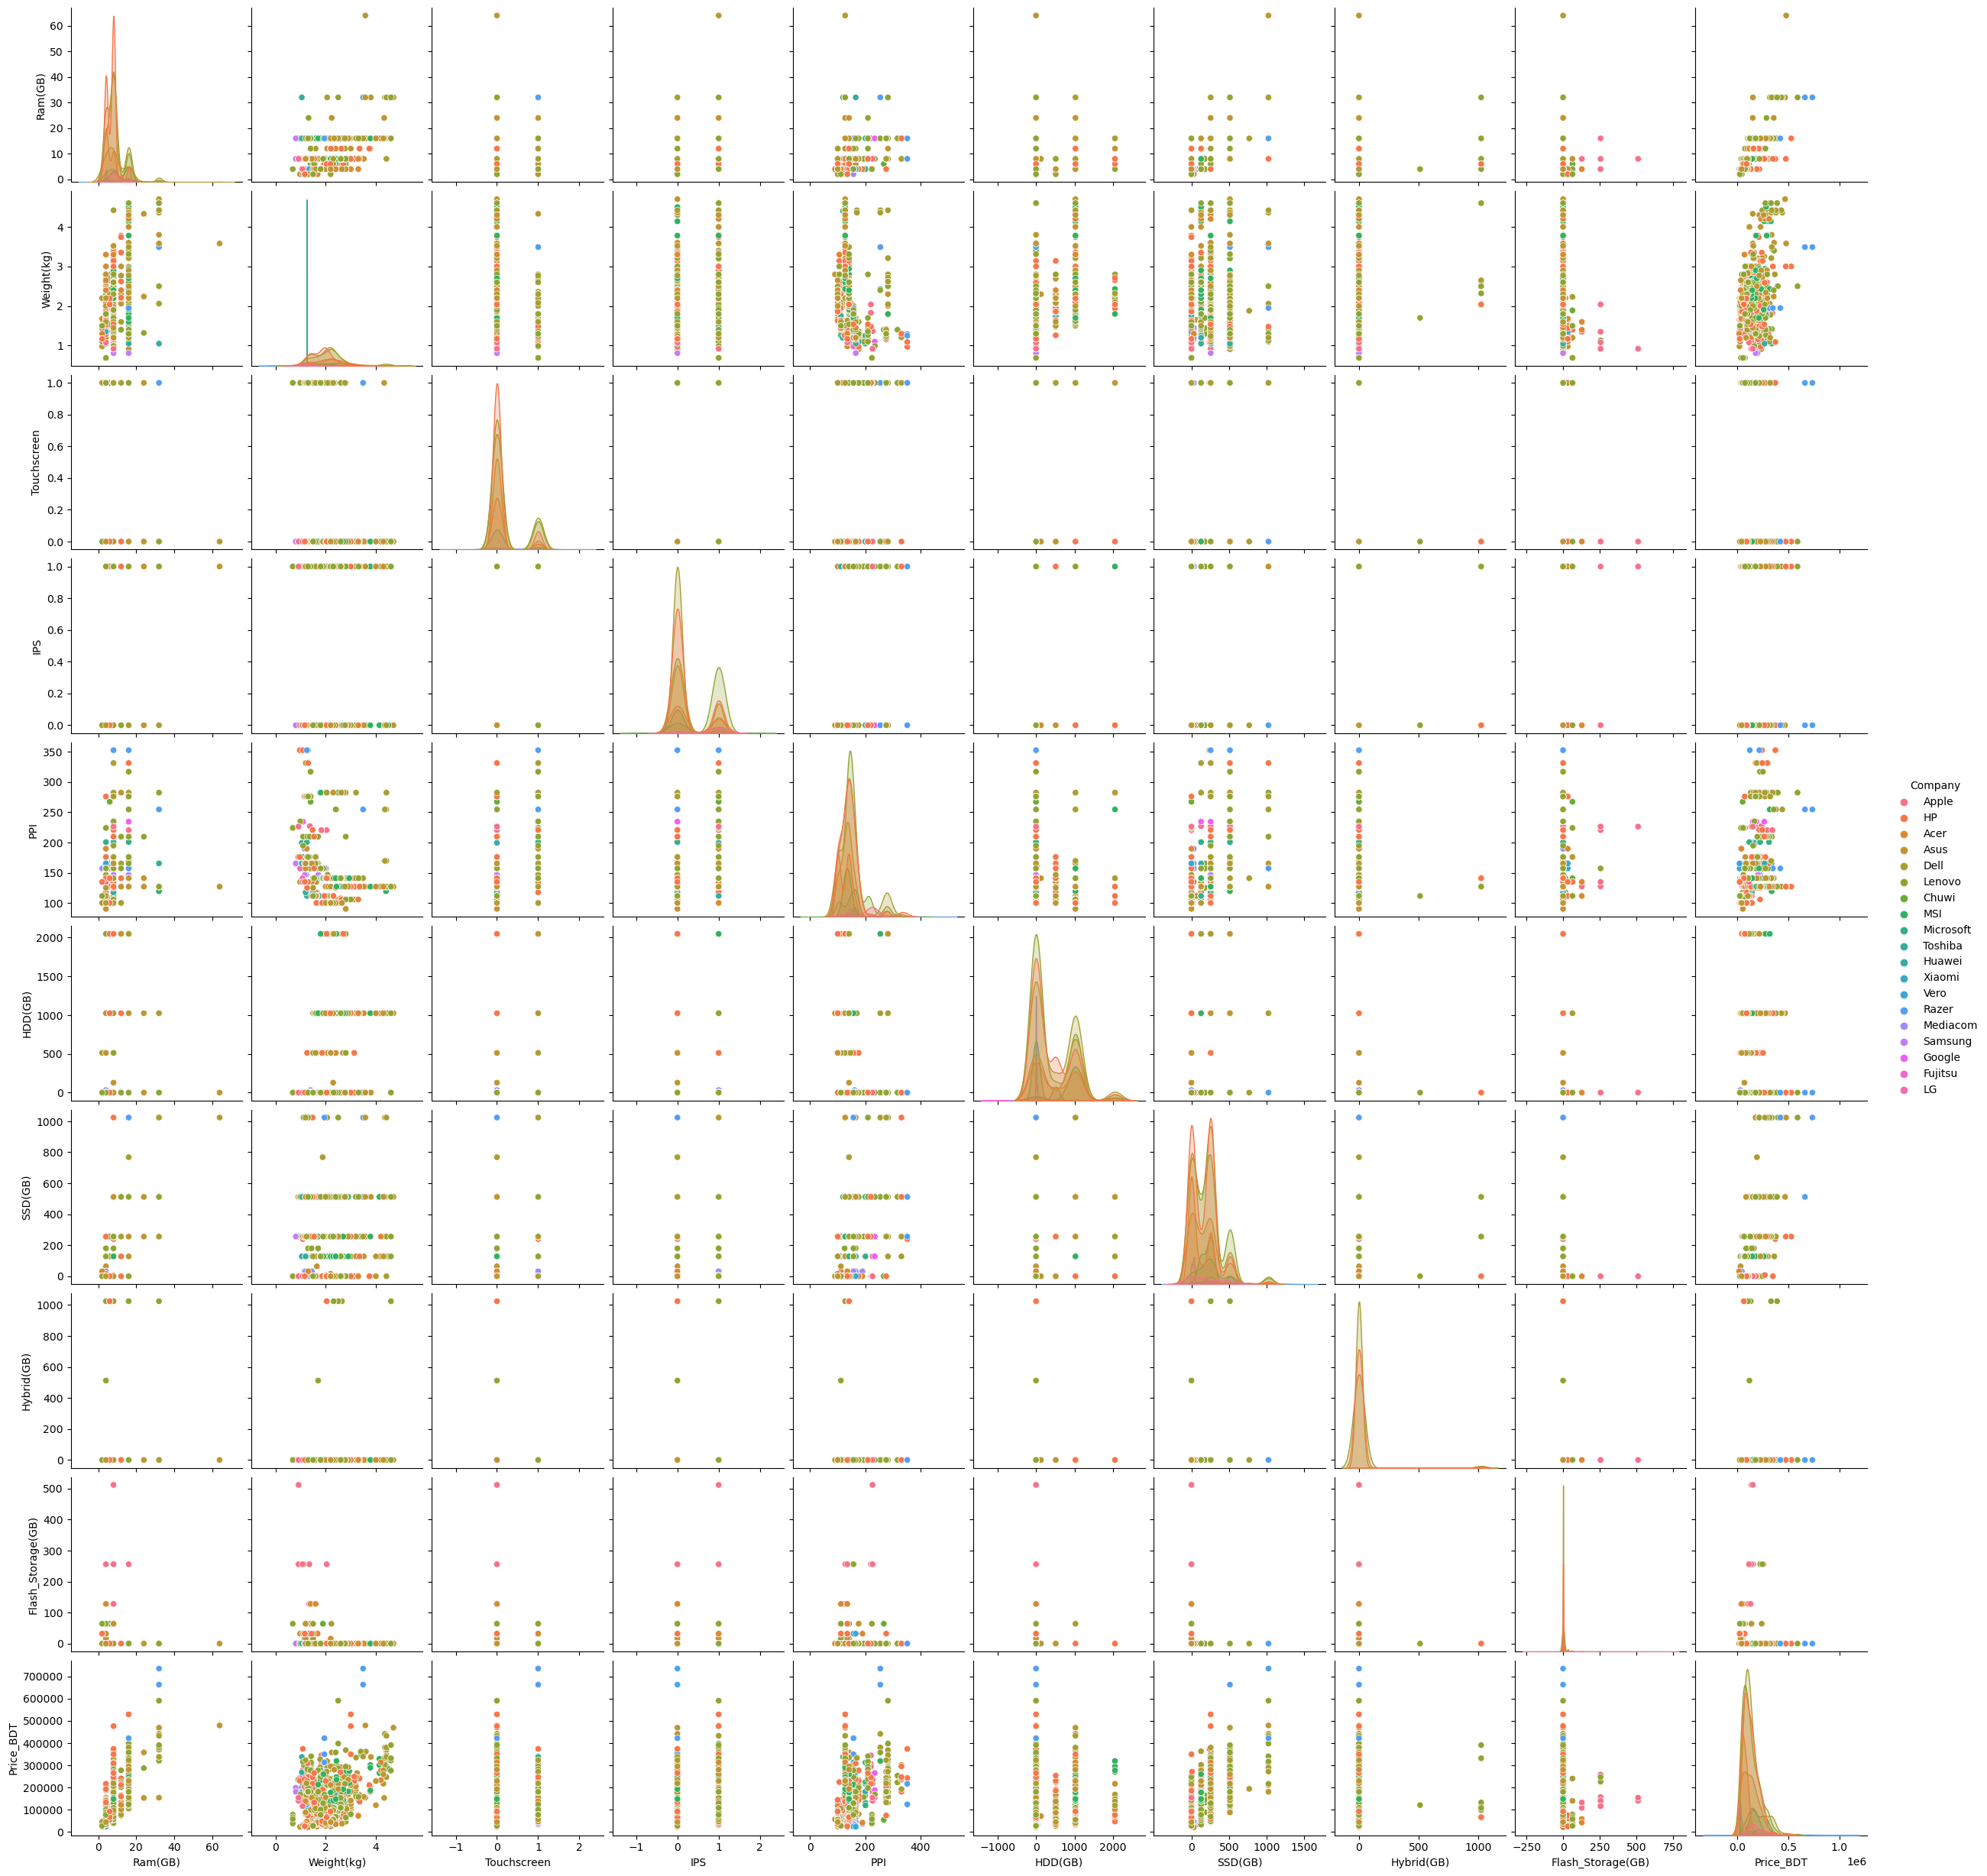

In [67]:
sns.pairplot(df,hue = 'Company',height=2.5)
plt.show()